# Financial Distress Prediction

## Introduction
Financial distress prediction is a key issue in measuring corporate solvency. Its main objective is to distinguish normal companies from those at risk of financial distress. For enterprises themselves, financial distress prediction can help to identify risks early, make plans according to the actual situation, and adjust business strategy. For investors, financial distress prediction can help determine the financial risks of enterprises and choose investment projects reasonably according to their risk preferences. For regulators, financial distress prediction can help to understand the financial status of each company in a timely manner, do a good job in supervision and management, and maintain the stability of the financial market. Therefore, how to predict the financial distress of enterprises effectively has become a hot topic in academic and business circles.

## Problem Statement
We have been given four data files that include train data, test data, sample submissions and data dictinary. In the data dictionary, meaning of each atttribute from the train and test data is given. By exploring the attributes, we have to find/predict whether somebody will experience financial distress in the next two years.
The goal of this project, is to build a model that borrowers can use to help make the best financial decisions. And for that we will train our model with large amount of data ('the train data' where labels already given) and use hyper parameter tuning to increase it's accuracy. At the end, we will make predictions on test data and save them along with our model.

Column Description

SeriousDlqin2yrs: 90 days past due delinquency or worse
RevolvingUtilizationOfUnsecuredLines: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
age: Age of borrower in years
NumberOfTime30-59DaysPastDueNotWorse: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
DebtRatio: Monthly debt payments, alimony,living costs divided by monthy gross income
MonthlyIncome: Monthly income
NumberOfOpenCreditLinesAndLoans: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
NumberOfTimes90DaysLate: Number of times borrower has been 90 days or more past due.
NumberRealEstateLoansOrLines : Number of mortgage and real estate loans including home equity lines of credit
NumberOfTime60-89DaysPastDueNotWorse: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
NumberOfDependents: Number of dependents in family excluding themselves (spouse, children etc.)


## Importing Libraries

In [1]:
#ignoring warnings to keep the code clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Loading Data

In [3]:
train_df = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
print(train_df.shape)
train_df.head()

(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
test_df = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-test.csv')
print(test_df.shape)
test_df.head()

(101503, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [5]:
submission =  pd.read_csv('/kaggle/input/GiveMeSomeCredit/sampleEntry.csv')
submission.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [6]:
train_df['SeriousDlqin2yrs'].unique()

array([1, 0])

Labels are in the form of binary numbers.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

## Exploratory Data Analysis

### Stastical Information

In [9]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
test_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [11]:
train_df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

Observe that the number of `0's` are lot more than the `1's`, training with such distribution had lead me to lesser accuracy therefore, we will only take fraction of data whose label is `0` this time.

In [12]:
train0=train_df[train_df['SeriousDlqin2yrs']==0].sample(frac=0.06684)
train1=train_df[train_df['SeriousDlqin2yrs']==1].copy()
train_df=pd.concat([train0, train1], axis=0)
train_df['SeriousDlqin2yrs'].value_counts()

1    10026
0     9356
Name: SeriousDlqin2yrs, dtype: int64

### Distribution of data

In [13]:
Atttributes= ['RevolvingUtilizationOfUnsecuredLines', 'age',
              'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
              'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
              'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
              'NumberOfDependents']

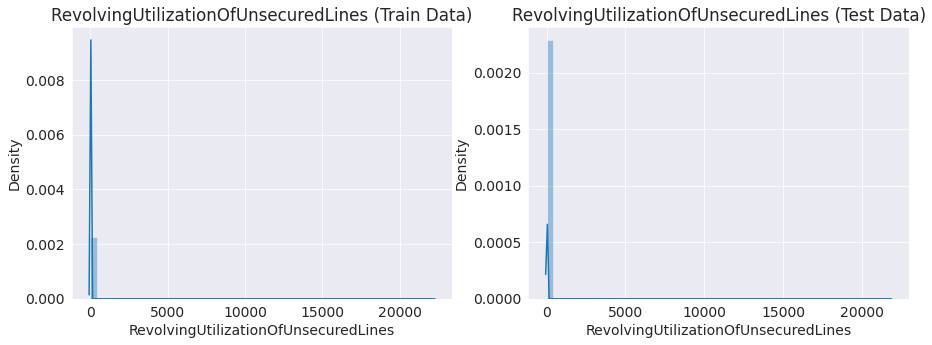

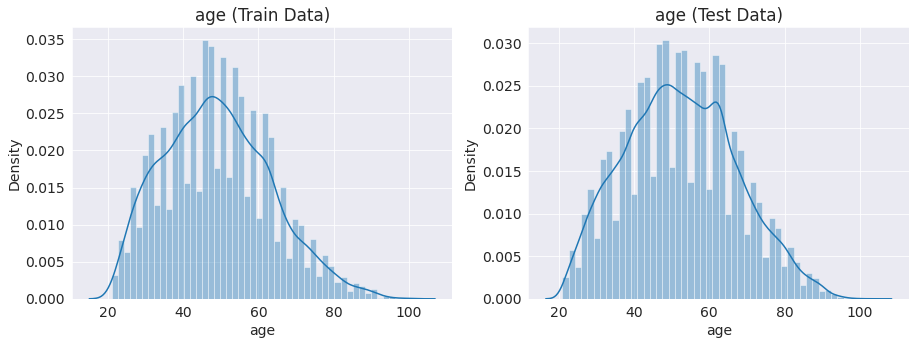

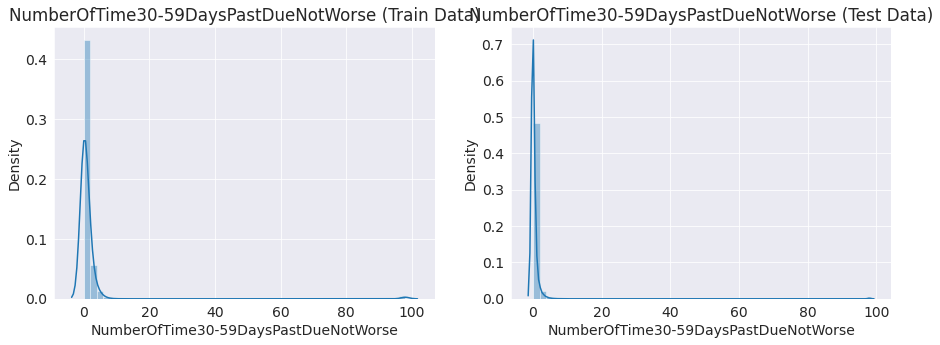

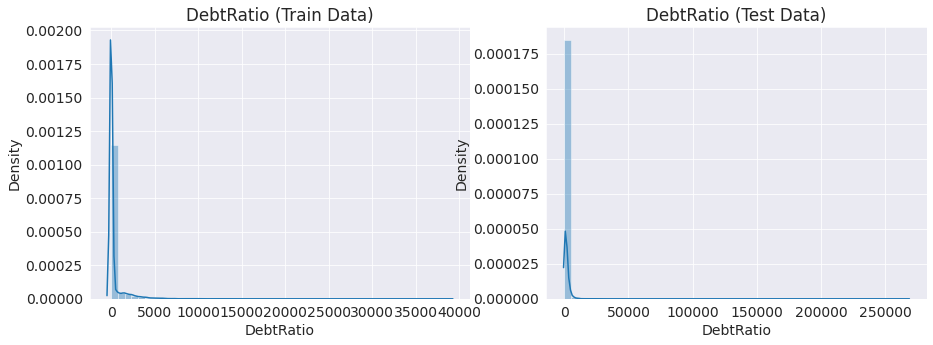

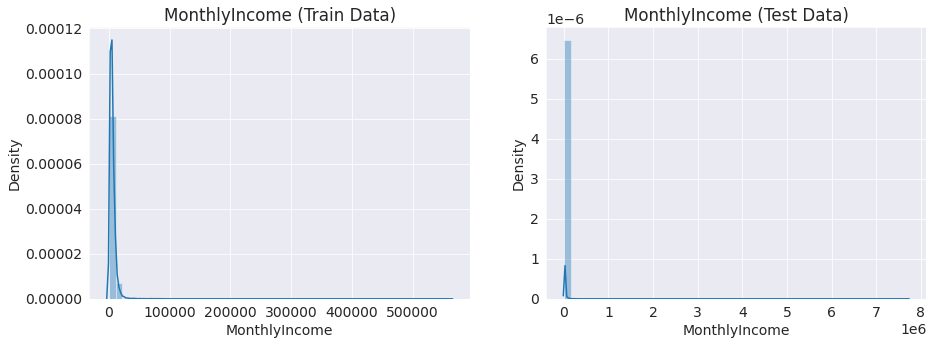

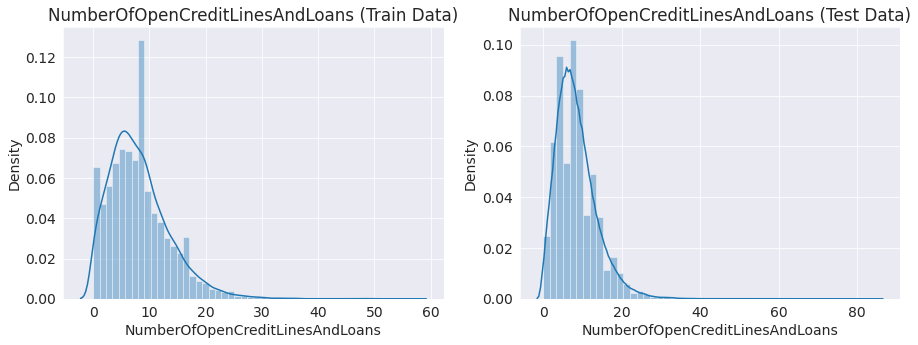

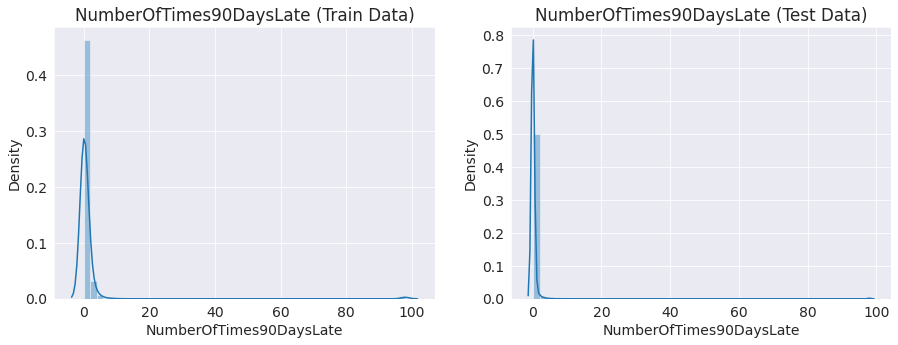

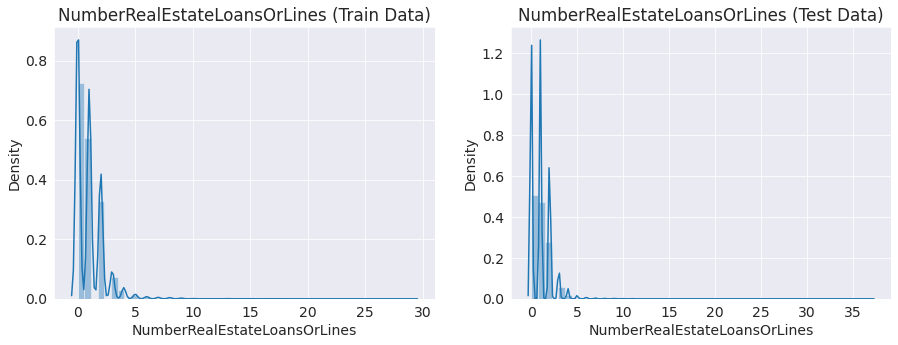

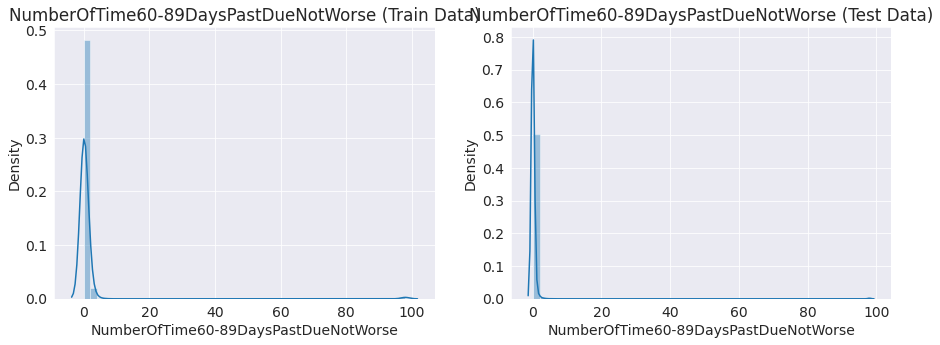

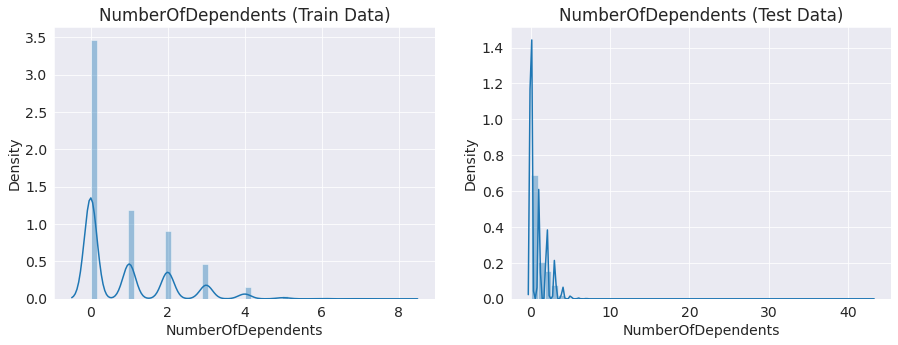

In [14]:
for i in Atttributes:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    axes[0].set_title(i+' (Train Data)')
    sns.distplot(train_df[i], ax=axes[0])
    axes[1].set_title(i+' (Test Data)')
    sns.distplot(test_df[i], ax=axes[1])

There are lot of outliers in both dataset. We need to take care of them properly so that they don't trouble us after scaling the data. For that we will substitute the outliers with value which comes under two times stadard deviation. We choosing two times standard deviation since it covers 95% of the part of the distribution.

In [15]:
def normalizer(x,df):
    upper_boundary=df[x].mean()+2*df[x].std()
    lower_boundary=df[x].mean()-2*df[x].std()
    max_att=df[x].max()
    min_att=df[x].min()
    return {'Attribute':x, 'upper_boundary': upper_boundary, 'lower_boundary': lower_boundary, 
           'max_att':max_att, 'min_att':min_att }

In [16]:
train_limits = pd.DataFrame([normalizer(x, train_df) for x in Atttributes])
train_limits

,Attribute,upper_boundary,lower_boundary,max_att,min_att
0,RevolvingUtilizationOfUnsecuredLines,422.349680,-411.764555,22198.0,0.0
1,age,77.504247,20.664053,101.0,21.0
2,NumberOfTime30-59DaysPastDueNotWorse,19.278742,-16.459322,98.0,0.0
3,DebtRatio,2581.007572,-1953.721315,38793.0,0.0
4,MonthlyIncome,21263.748353,-9122.270515,562466.0,0.0
5,NumberOfOpenCreditLinesAndLoans,18.983373,-2.700637,57.0,0.0
6,NumberOfTimes90DaysLate,19.063159,-16.697665,98.0,0.0
7,NumberRealEstateLoansOrLines,3.547952,-1.547332,29.0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,18.881270,-16.796553,98.0,0.0
9,NumberOfDependents,3.202834,-1.491428,8.0,0.0


In [17]:
test_limits = pd.DataFrame([normalizer(x, test_df) for x in Atttributes])
test_limits

,Attribute,upper_boundary,lower_boundary,max_att,min_att
0,RevolvingUtilizationOfUnsecuredLines,397.622078,-387.002077,21821.0,0.0
1,age,81.964949,22.845924,104.0,21.0
2,NumberOfTime30-59DaysPastDueNotWorse,9.530745,-8.623205,98.0,0.0
3,DebtRatio,3609.665483,-2920.715442,268326.0,0.0
4,MonthlyIncome,79872.236339,-66162.165160,7727000.0,0.0
5,NumberOfOpenCreditLinesAndLoans,18.741714,-1.834687,85.0,0.0
6,NumberOfTimes90DaysLate,9.328408,-8.735026,98.0,0.0
7,NumberRealEstateLoansOrLines,3.233580,-1.207433,37.0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,9.277472,-8.736838,98.0,0.0
9,NumberOfDependents,3.042603,-1.504510,43.0,0.0


In [18]:
def NormAtt(i, lim_df, df):
    Att=lim_df.iloc[i].Attribute
    UL=lim_df.iloc[i].upper_boundary
    LL=lim_df.iloc[i].lower_boundary
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    axes[0].set_title('Old Distribution of '+Att)
    sns.distplot(df[Att], ax=axes[0])
    df.loc[df[Att]<LL,Att]=LL
    df.loc[df[Att]>UL,Att]=UL
    axes[1].set_title('New Distribution of '+Att)
    sns.distplot(df[Att], ax=axes[1])

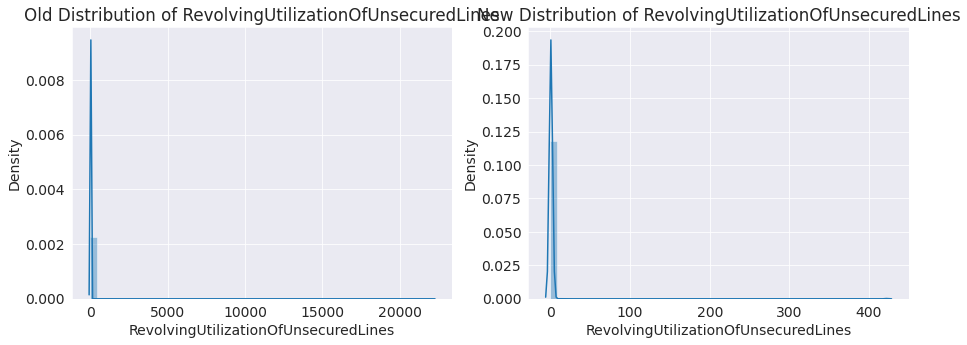

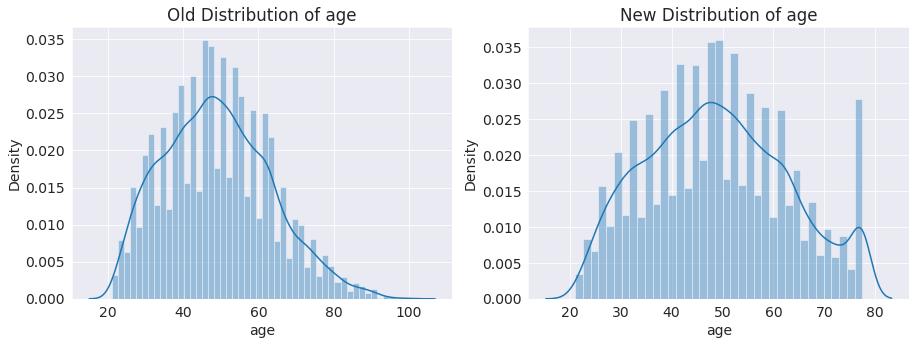

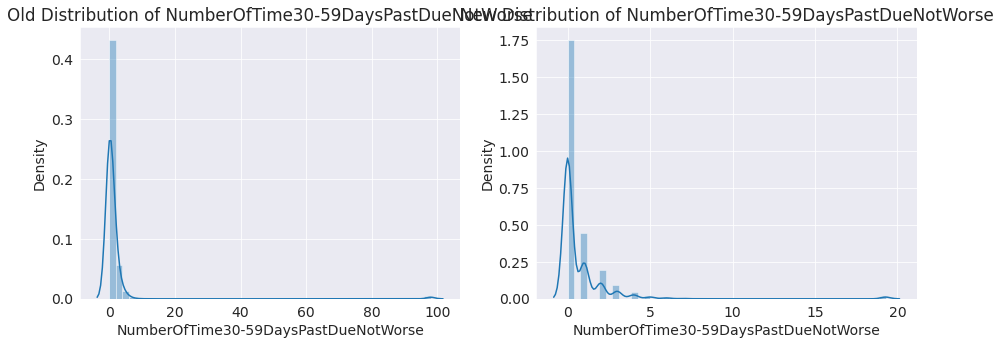

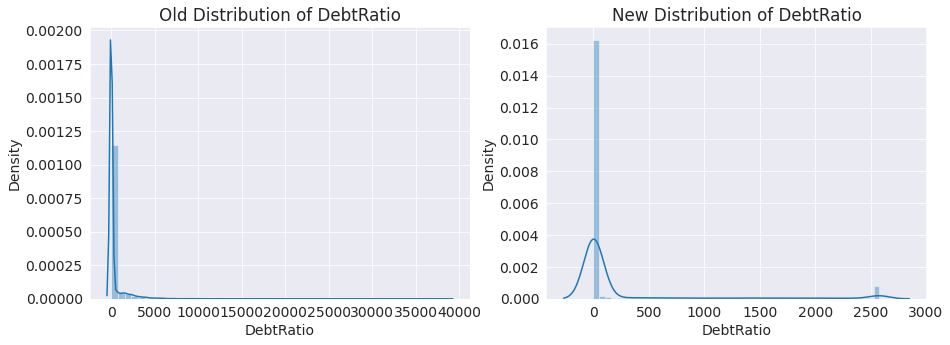

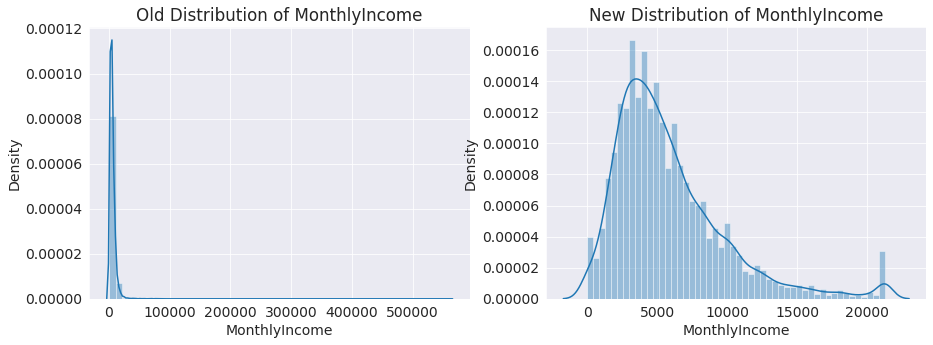

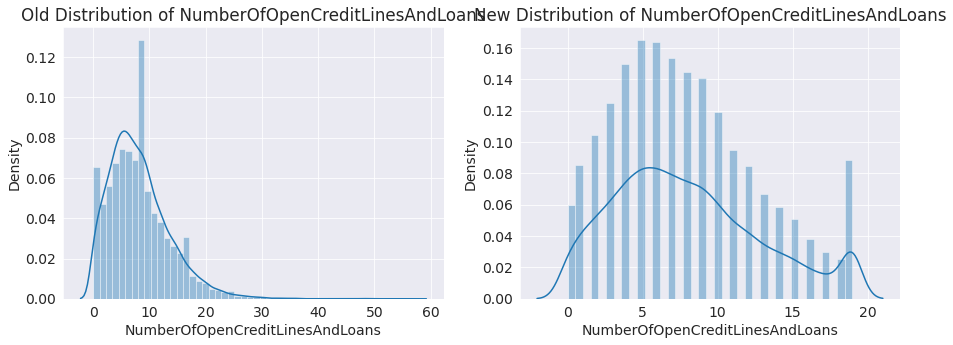

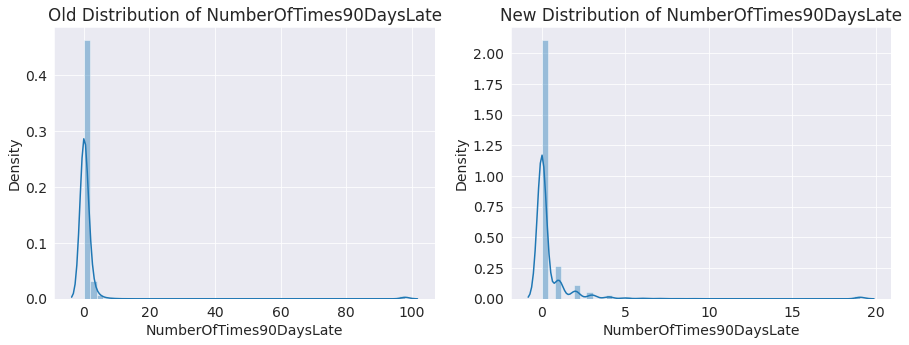

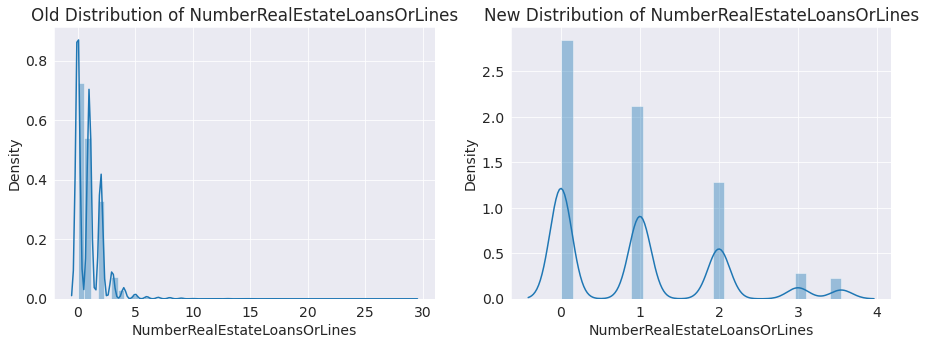

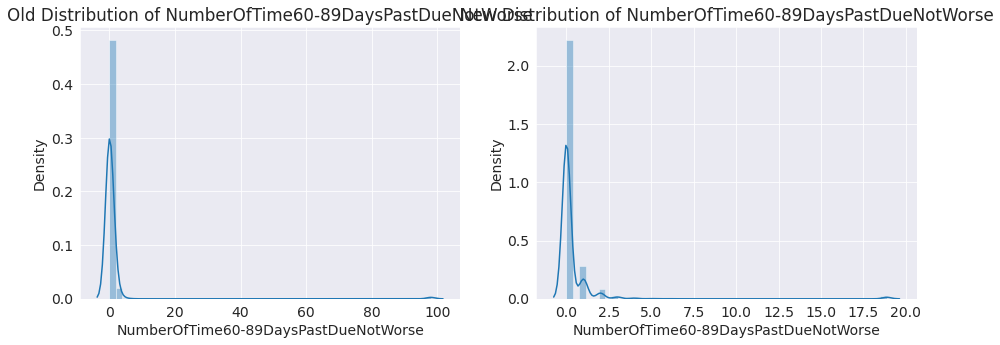

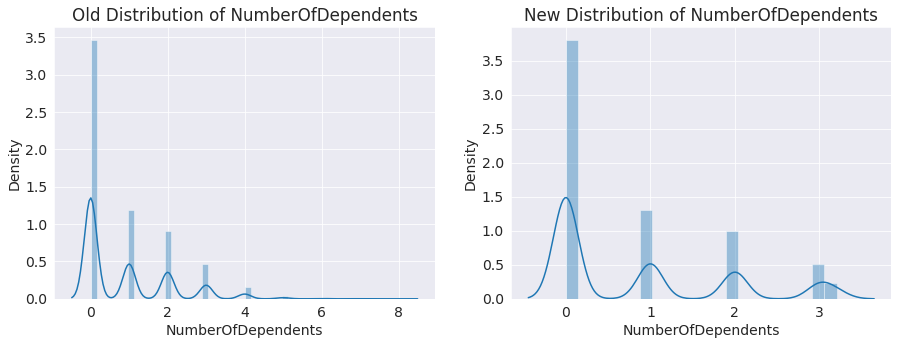

In [19]:
for i in range(0,10):
    NormAtt(i, train_limits, train_df)

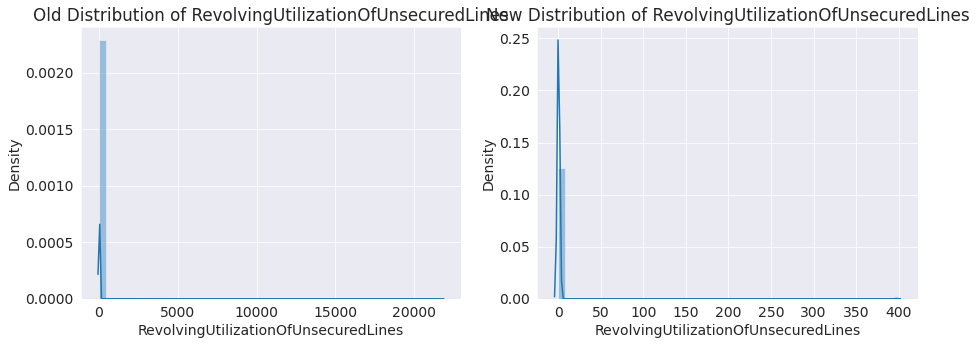

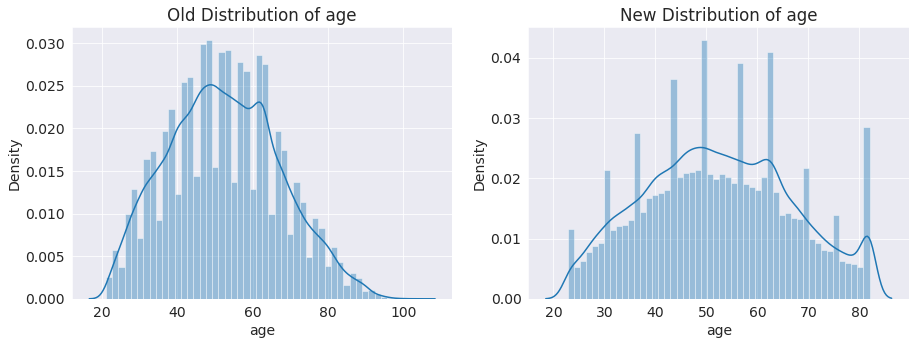

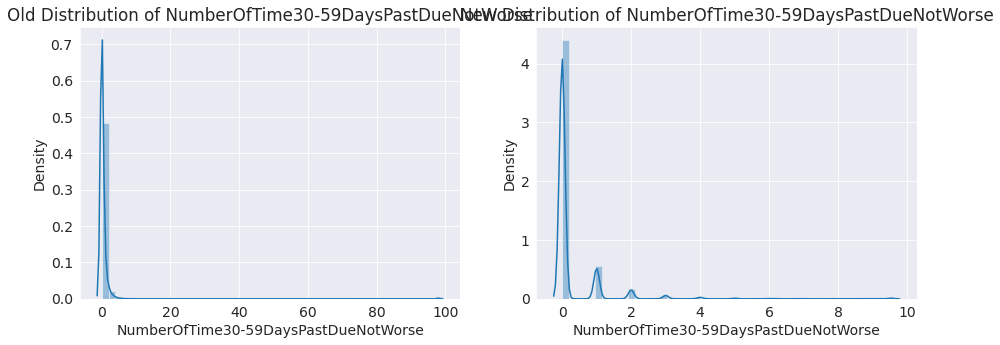

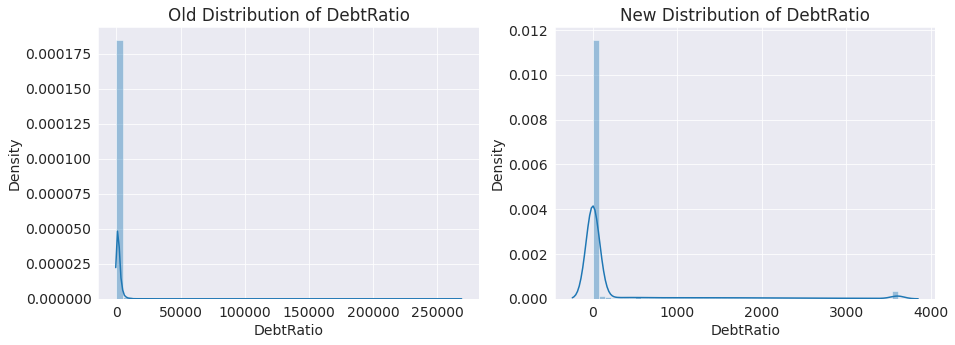

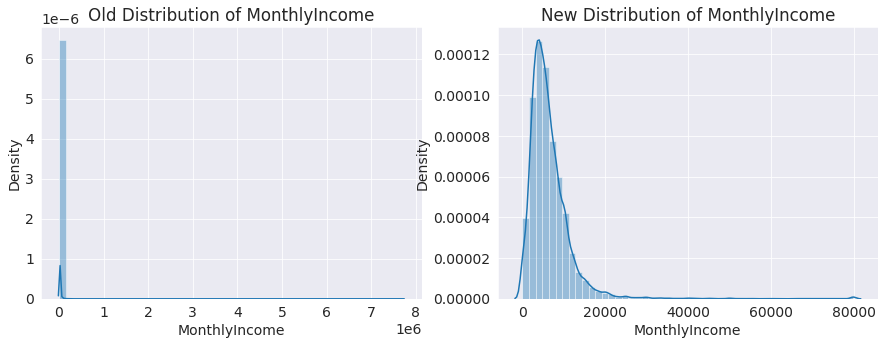

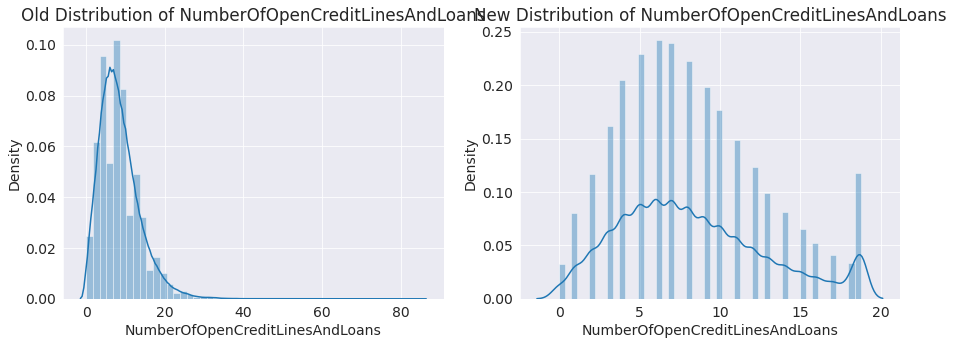

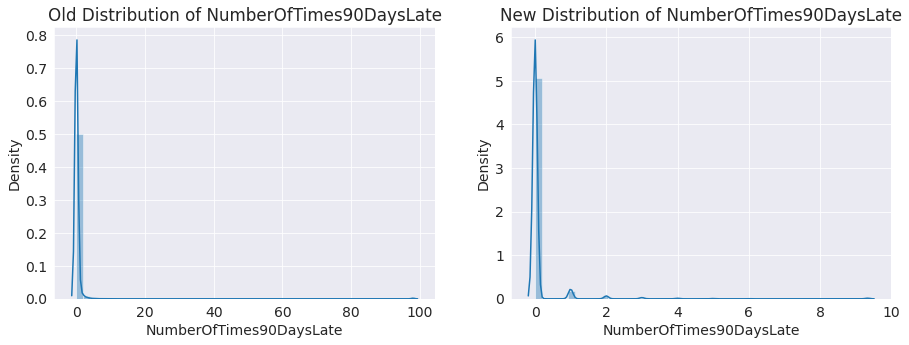

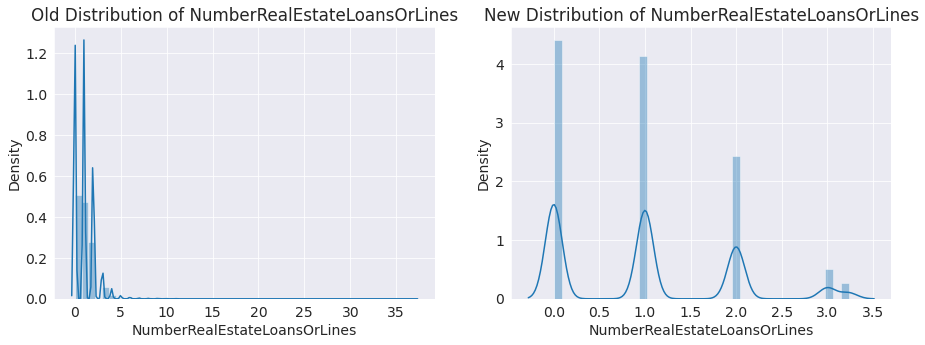

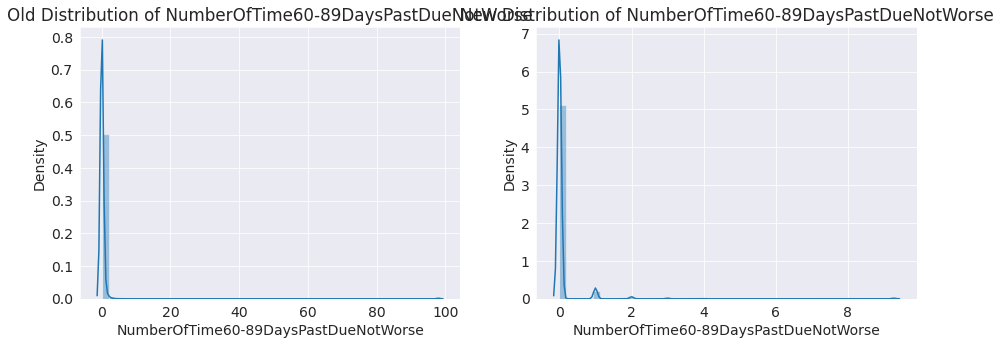

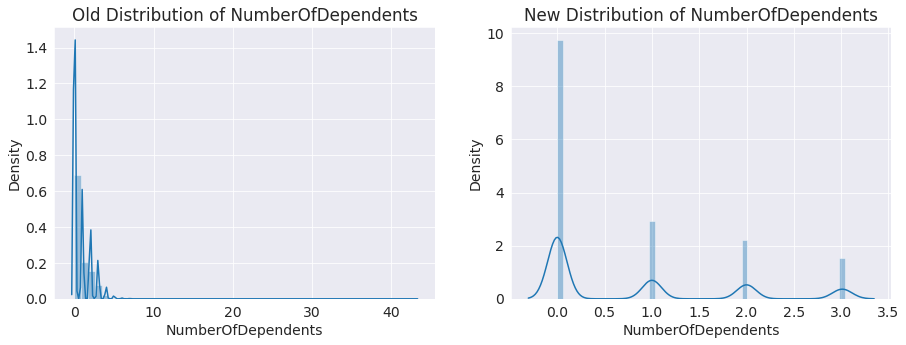

In [20]:
for i in range(0,10):
    NormAtt(i, test_limits, test_df)

#### Correlation

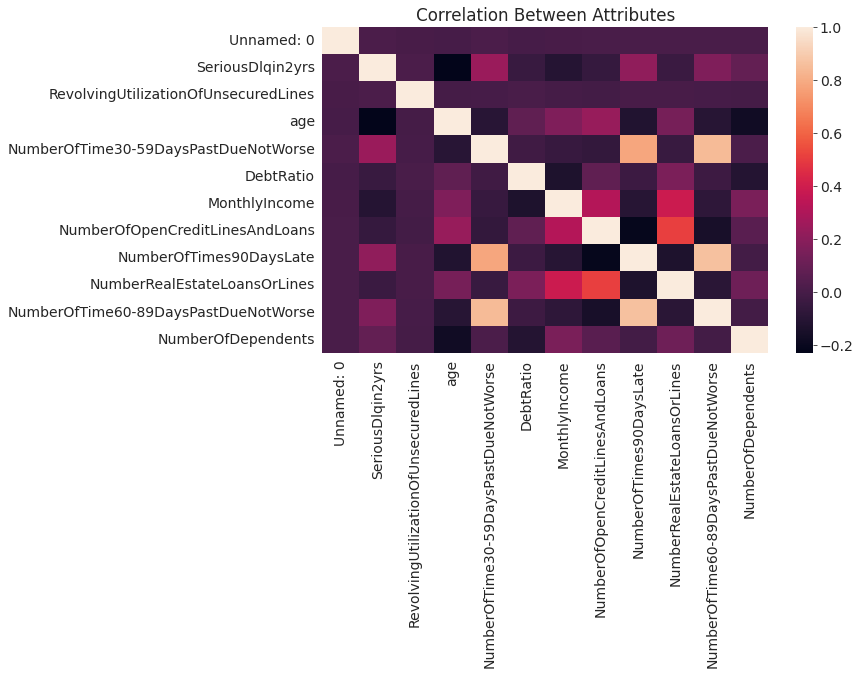

In [21]:
sns.heatmap(train_df.corr())
plt.title('Correlation Between Attributes');

In train data `NumberOfTime60-89DaysPastDueNotWorse` shows good correlation with `NumberOfTime30-59DaysPastDueNotWorse` and `NumberOfTimes90DaysLate`.

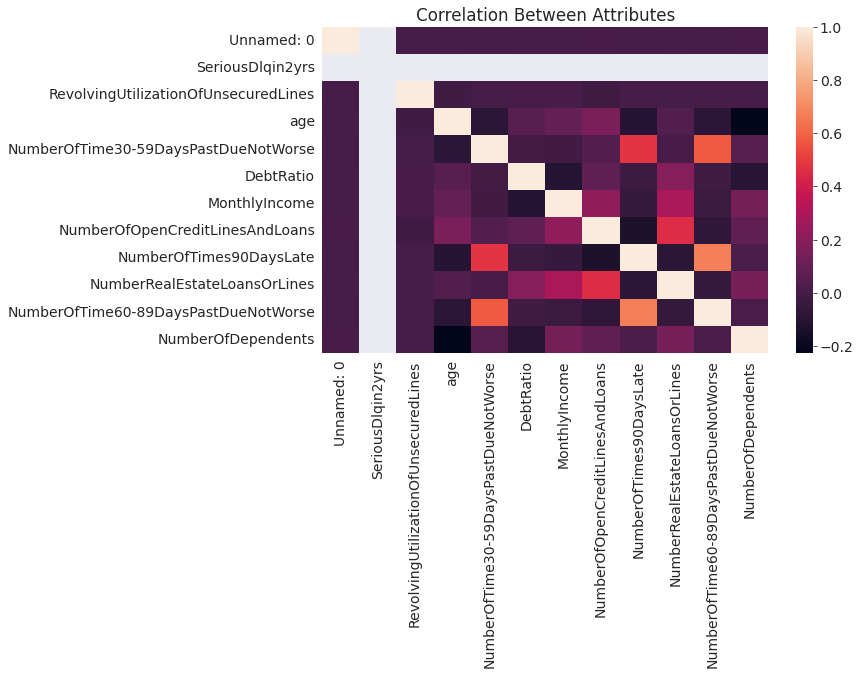

In [22]:
sns.heatmap(test_df.corr())
plt.title('Correlation Between Attributes');

Similiarly, in test data `NumberOfTime60-89DaysPastDueNotWorse` shows good correlation with `NumberOfTime30-59DaysPastDueNotWorse` and `NumberOfTimes90DaysLate`.

### Input and Target Columns

In [23]:
train_df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [24]:
input_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
target_col = 'SeriousDlqin2yrs'

In [25]:
inputs = train_df[input_cols].copy()
targets = train_df[target_col].copy()

In [26]:
test_inputs = test_df[input_cols].copy()

### Imputing missing numeric values

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
imputer = SimpleImputer(strategy = 'median').fit(train_df[input_cols])

In [29]:
inputs[input_cols] = imputer.transform(inputs[input_cols])
test_inputs[input_cols] = imputer.transform(test_inputs[input_cols])

In [30]:
inputs[input_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [31]:
test_inputs[input_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Scaling Numeric Features

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler().fit(train_df[input_cols])

In [34]:
inputs[input_cols] = scaler.transform(inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [35]:
inputs.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [36]:
test_inputs.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.000000,0.032669,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,0.941452,1.078945,0.494365,1.398549,3.756263,0.98727,0.489342,0.911393,0.491358,0.949972


In [37]:
inputs.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
87400,0.000275,0.194676,0.000000,0.000069,0.254706,0.158033,0.0,0.281853,0.0,0.000000
129009,0.000896,0.371653,0.103741,0.000246,0.221786,0.579454,0.0,0.563706,0.0,0.000000
5822,0.000327,0.088489,0.000000,0.000032,0.247369,0.263388,0.0,0.000000,0.0,0.000000
29255,0.001111,0.654818,0.051871,0.000117,0.127447,0.421421,0.0,0.000000,0.0,0.312224
121990,0.000004,1.000000,0.000000,0.000387,0.234154,0.158033,0.0,0.000000,0.0,0.000000


In [38]:
test_inputs.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.002097,0.389351,0.000000,0.000069,0.268062,0.210711,0.0,0.000000,0.0,0.000000
1,0.001097,0.637120,0.000000,0.000204,0.429887,0.790165,0.0,0.911393,0.0,0.624447
2,0.000102,0.672516,0.000000,0.000266,0.239045,0.632132,0.0,0.281853,0.0,0.624447
3,0.000664,0.300862,0.051871,0.000359,0.150491,0.368744,0.0,0.563706,0.0,0.000000
4,0.002368,0.106187,0.000000,0.000008,0.181765,0.210711,0.0,0.000000,0.0,0.312224


### Modeling : DecisionTreeClassifier

#### Splitting

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.25)

#### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model = DecisionTreeClassifier(random_state=42)

In [42]:
#fitting the model
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

#### Evaluation

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
train_preds = model.predict(X_train)

In [45]:
train_preds

array([0, 0, 0, ..., 0, 1, 1])

In [46]:
pd.value_counts(train_preds)

1    7485
0    7051
dtype: int64

In [47]:
#Probabilities for each prediction
train_probs = model.predict_proba(X_train)

In [48]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [49]:
accuracy_score(train_targets, train_preds)

0.9996560264171711

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.We can make predictions and compute accuracy in one step using `model.score`

In [50]:
model.score(X_val, val_targets)

0.6960379694593479

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

In [51]:
val_targets.value_counts() / len(val_targets)

1    0.523731
0    0.476269
Name: SeriousDlqin2yrs, dtype: float64

In [52]:
#we will store this result as base_acc to use it later
base_acc = accuracy_score(train_targets, train_preds), model.score(X_val, val_targets)
base_acc

(0.9996560264171711, 0.6960379694593479)

#### Visualization of Decision Tree

In [53]:
from sklearn.tree import plot_tree, export_text

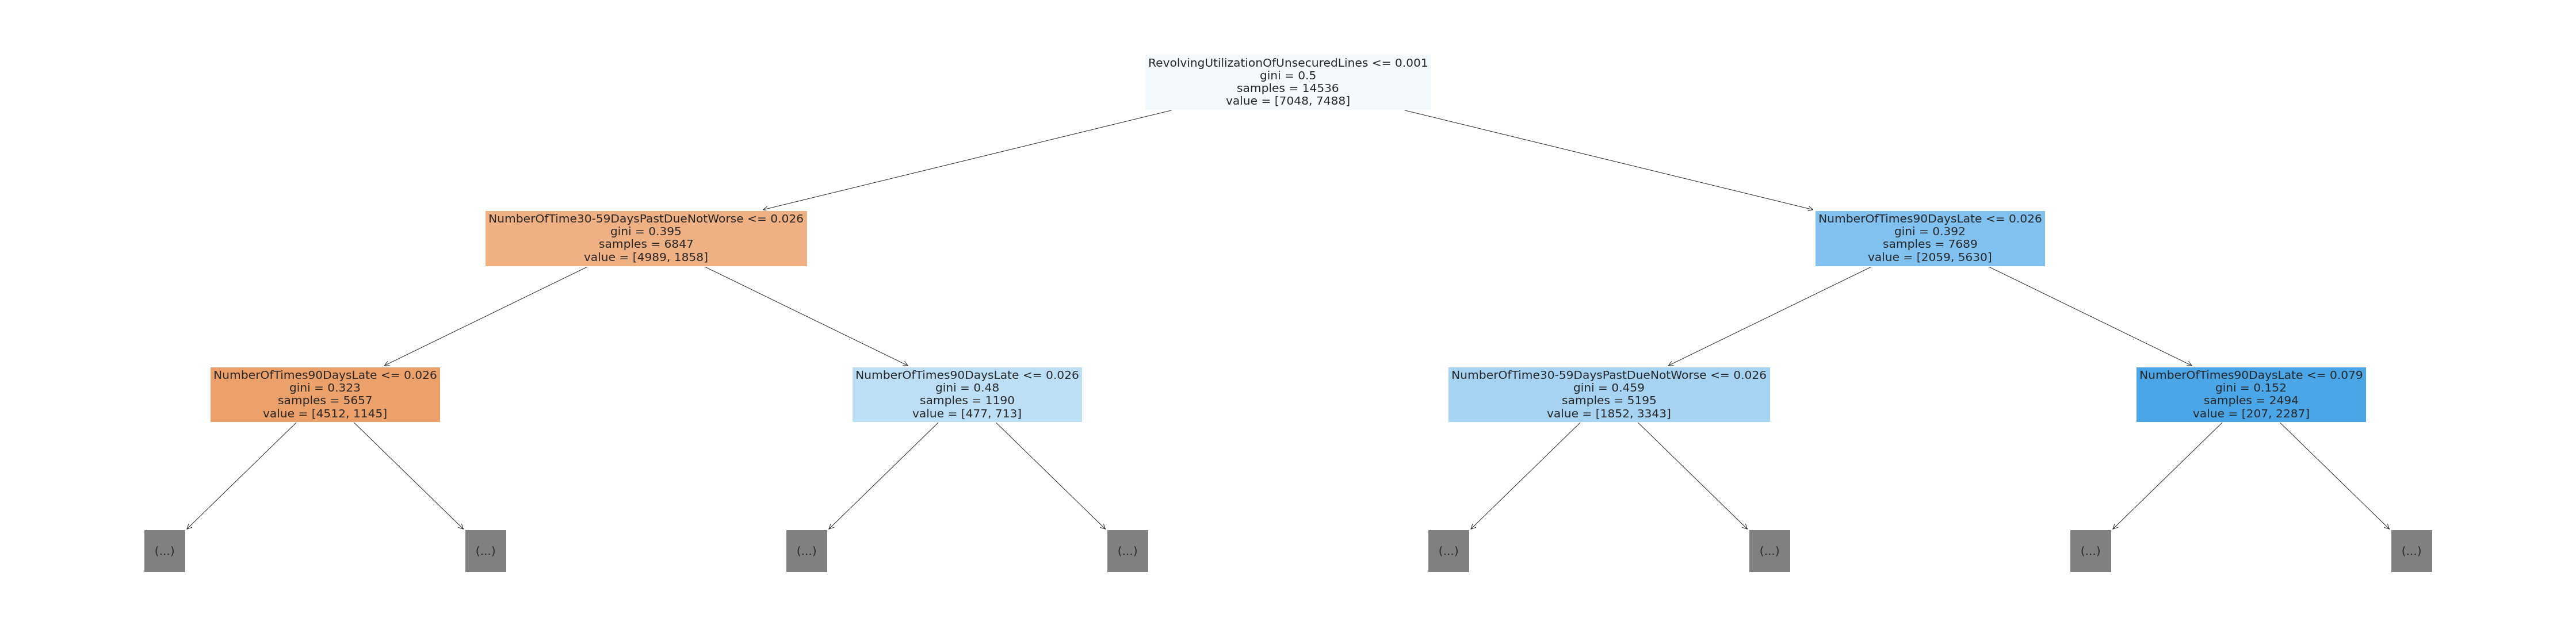

In [54]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [55]:
model.tree_.max_depth

34

In [56]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |--- NumberOfTime30-59DaysPastDueNotWorse <= 0.03
|   |   |--- NumberOfTimes90DaysLate <= 0.03
|   |   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.03
|   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |   |   |   |   |--- NumberRealEstateLoansOrLines <= 0.70
|   |   |   |   |   |   |--- age <= 0.66
|   |   |   |   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 0.55
|   |   |   |   |   |   |   |   |--- age <= 0.24
|   |   |   |   |   |   |   |   |   |--- NumberOfDependents <= 0.97
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome <= 0.56
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome >  0.56
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- NumberOfDependents >  0.97
|   |   |   |   |   |   |   |   |   |   |--- DebtRatio <= 0.00
|   |   |   |   |   |   |   |

#### Feature Importance

In [57]:
model.feature_importances_

array([0.34118302, 0.11532937, 0.07372382, 0.13939426, 0.11719706,
       0.07292029, 0.05848408, 0.02801074, 0.02374769, 0.03000966])

In [58]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [59]:
importance_df.head(10)

,feature,importance
0,RevolvingUtilizationOfUnsecuredLines,0.341183
3,DebtRatio,0.139394
4,MonthlyIncome,0.117197
1,age,0.115329
2,NumberOfTime30-59DaysPastDueNotWorse,0.073724
5,NumberOfOpenCreditLinesAndLoans,0.072920
6,NumberOfTimes90DaysLate,0.058484
9,NumberOfDependents,0.030010
7,NumberRealEstateLoansOrLines,0.028011
8,NumberOfTime60-89DaysPastDueNotWorse,0.023748


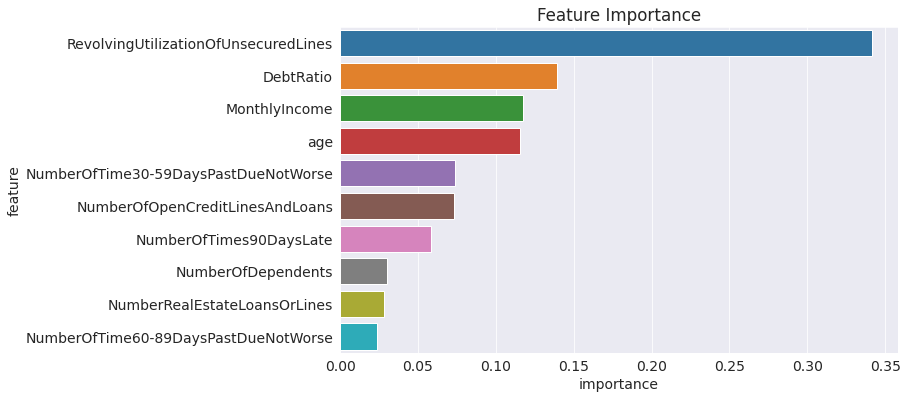

In [60]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

#### Hyperparameter Tuning
We will define a function that will check the accuracy with different parameters and their various values over a range. Also plotting the graph of relation between the accuracy and parameter values.

In [61]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print('Max Acc by:', val_acc.index(max(val_acc))+ int(min(param_values)))

#### `criterion`

In [62]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.9996560264171711, 0.6943871234007429)

In [63]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.9996560264171711, 0.6960379694593479)

`criterion='entropy'` increases the accuracy

#### `splitter`

In [64]:
model = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.9996560264171711, 0.6910854312835328)

In [65]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.9996560264171711, 0.6943871234007429)

though `splitter='best'` gives more accuracy than the `splitter='random'` but it is same as before cause it is a default arguement

#### `max_depth`

Max Acc by: 5


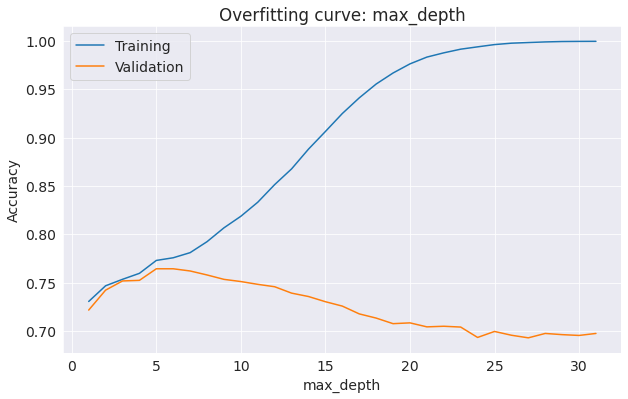

In [66]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42,criterion='gini', **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_depth=[i for i in range(1,32)]
test_param_and_plot('max_depth',max_depth)

In [67]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.7750412768299395, 0.7655798596780851)

#### `max_leaf_nodes`

Max Acc by: 21


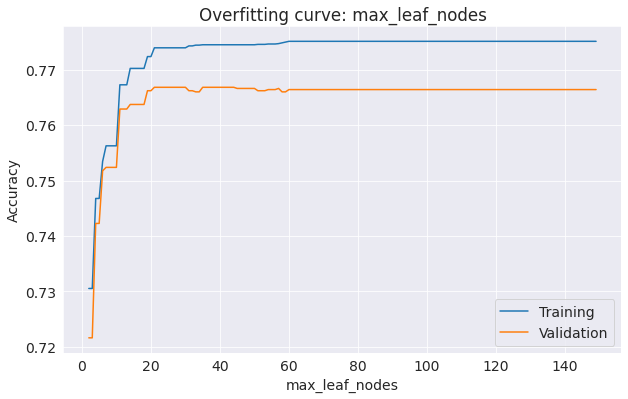

In [68]:
def test_params(**params):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_leaf_nodes=[i for i in range(2,150)]
test_param_and_plot('max_leaf_nodes',max_leaf_nodes)

In [69]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.7739405613648872, 0.7668179942220388)

#### `min_samples_split`

Max Acc by: 2


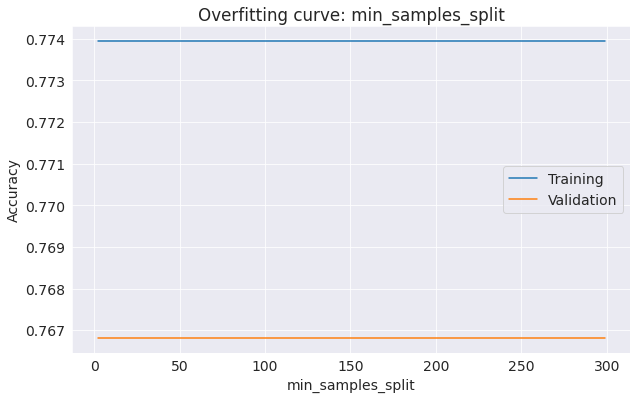

In [70]:
def test_params(**params):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                                   random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_split=[i for i in range(2,300)]
test_param_and_plot('min_samples_split',min_samples_split)

In [71]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.7739405613648872, 0.7668179942220388)

#### `min_samples_leaf`

Max Acc by: 134


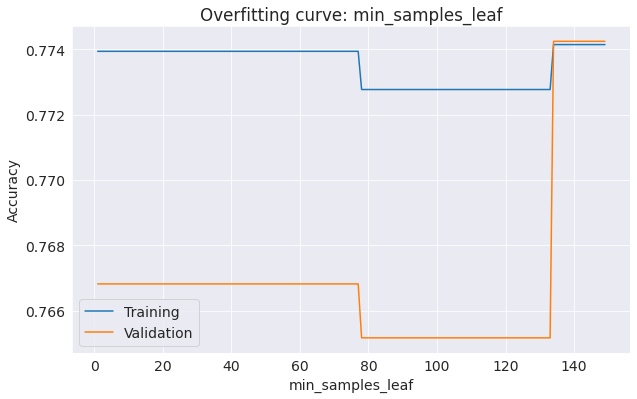

In [72]:
def test_params(**params):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                                   min_samples_split=2, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_leaf=[i for i in range(1,150)]
test_param_and_plot('min_samples_leaf',min_samples_leaf)

In [73]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.7739405613648872, 0.7668179942220388)

#### `max_features`

Max Acc by: 5


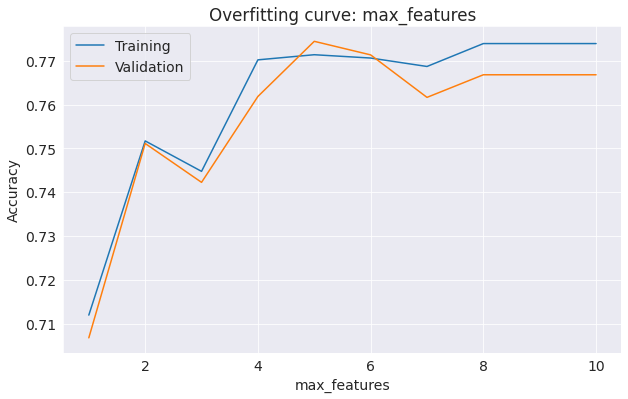

In [74]:
def test_params(**params):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_features=[i for i in range(1,11)]
test_param_and_plot('max_features',max_features)

In [75]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1,
                               max_features=10)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.7739405613648872, 0.7668179942220388)

#### `min_impurity_decrease`

Max Acc by: 0


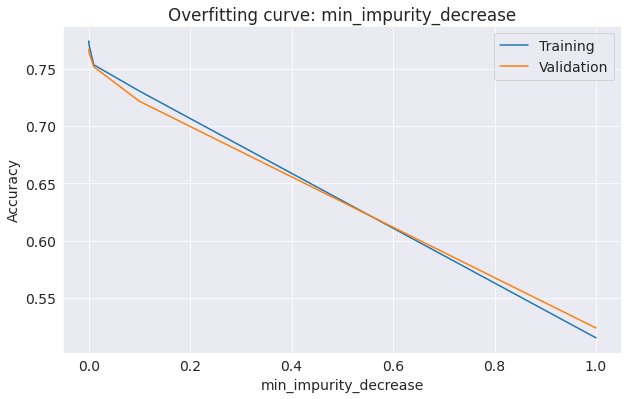

In [76]:
def test_params(**params):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1,
                               max_features=10, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_impurity_decrease=[1.0e-10,0, 1.0e-9, 1.0e-7, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0]
test_param_and_plot('min_impurity_decrease',min_impurity_decrease)

In [77]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1,
                               max_features=10,
                               min_impurity_decrease=0.0)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.7739405613648872, 0.7668179942220388)

#### `class_weight`

In [78]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1,
                               max_features=10,
                               min_impurity_decrease=0.0,class_weight={0:15.5, 1:1})
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.5560676940011007, 0.5437474205530334)

In [79]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1,
                               max_features=10,
                               min_impurity_decrease=0.0,class_weight={0:1.5, 1:1})
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.7519950467804073, 0.7534048699958729)

In [80]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1,
                               max_features=10,
                               min_impurity_decrease=0.0,class_weight={0:5, 1:1})
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.6800357732526142, 0.6743706149401568)

In [81]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1,
                               max_features=10,
                               min_impurity_decrease=0.0,class_weight={0:1, 1:0})
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.4848651623555311, 0.4762690879075526)

In [82]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1,
                               max_features=10,
                               min_impurity_decrease=0.0,class_weight={0:1, 1:0.5})
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9996560264171711, 0.6960379694593479)


(0.7444276279581729, 0.7461824184894759)

None of the combination of weights are seem to be working for further increment in the accuracy.

### Predictions with Best Parameter Values

In [83]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=27,
                               min_samples_split=2, random_state=42,
                               min_samples_leaf=1,
                               max_features=10,
                               min_impurity_decrease=0.0)
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.7739405613648872, 0.7668179942220388)

In [84]:
test_preds=model.predict(test_inputs)
test_preds

array([1, 0, 0, ..., 0, 1, 1])

In [85]:
pd.value_counts(test_preds) / len(test_preds)

0    0.680807
1    0.319193
dtype: float64

In [86]:
submission['Probability']=test_preds
submission.head()

,Id,Probability
0,1,1
1,2,0
2,3,0
3,4,1
4,5,1


In [87]:
#Saving Submissions as CSV File
submission.to_csv('submission.csv', index=None)

It gives the accuracy of 77.89% after submitting to the competition, which is good but we will have to try different algorithm.

### Modeling : RandomForestClassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [90]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [91]:
model.score(X_train, train_targets)

0.9995872317006054

In [92]:
model.score(X_val, val_targets)

0.776723070573669

Accuracy on validation data without hyper parameter tuning is significantly more than that of the untuned DecisionTreeClassifier. Since RandomForestClassifier uses multiple decision trees (n_estimators=100 by default) to make predictions and gives the prediction which the average of all the predictions given by each tree. We can see that none of the tree has accuracy higher than the decision tree.

In [93]:
len(model.estimators_)

100

In [94]:
def estimator_acc(i):
    model.estimators_[i].fit(X_train, train_targets)
    return model.estimators_[i].score(X_val, val_targets)

In [95]:
accuracy=[]
for i in range(0,100):
    accuracy.append(estimator_acc(i))

In [96]:
max(accuracy)

0.7073875361122576

See here the maximum accuracy of individual tree is `71.48%`  where as accuracy of RandomForest is `78.16%`

In [97]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

#### Feature Importance

In [98]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [99]:
importance_df.head(10)

,feature,importance
0,RevolvingUtilizationOfUnsecuredLines,0.273475
3,DebtRatio,0.133676
1,age,0.120875
4,MonthlyIncome,0.116438
2,NumberOfTime30-59DaysPastDueNotWorse,0.084043
6,NumberOfTimes90DaysLate,0.083411
5,NumberOfOpenCreditLinesAndLoans,0.079801
8,NumberOfTime60-89DaysPastDueNotWorse,0.042535
9,NumberOfDependents,0.033985
7,NumberRealEstateLoansOrLines,0.031761


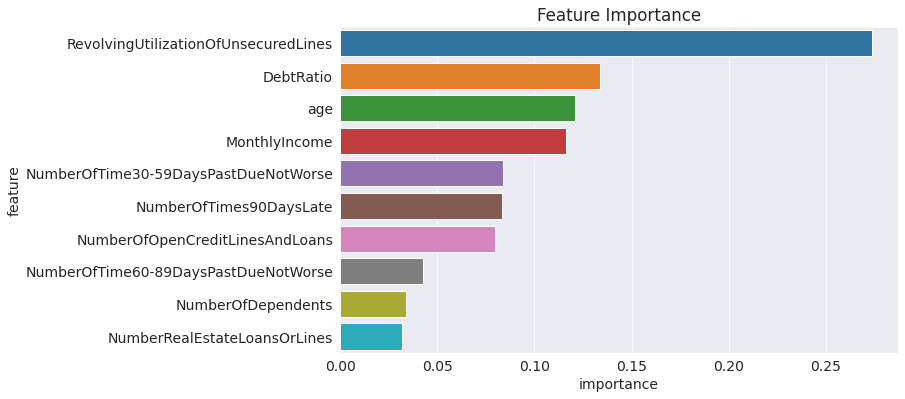

In [100]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

#### Hyperparameter Tuning
We will define a function that will check the accuracy with different parameters and their various values over a range. Also plotting the graph of relation between the accuracy and parameter values.

In [101]:
def test_params(**params):
    model = RandomForestClassifier(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print('Max Acc by:', val_acc.index(max(val_acc))+ int(min(param_values)))

In [102]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)
base_accs = base_train_acc, base_val_acc
base_accs

(0.9995872317006054, 0.776723070573669)

#### `n_estimator`

Max Acc by: 107


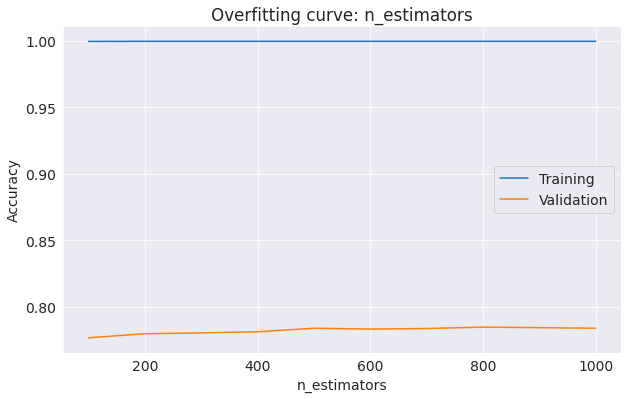

In [103]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
n_estimators=[100, 200, 300, 400, 500,600, 700, 800, 900, 1000]
test_param_and_plot('n_estimators',n_estimators)

In [104]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=800)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.9996560264171711, 0.7847709451093685)

#### `max_depth`

Max Acc by: 11


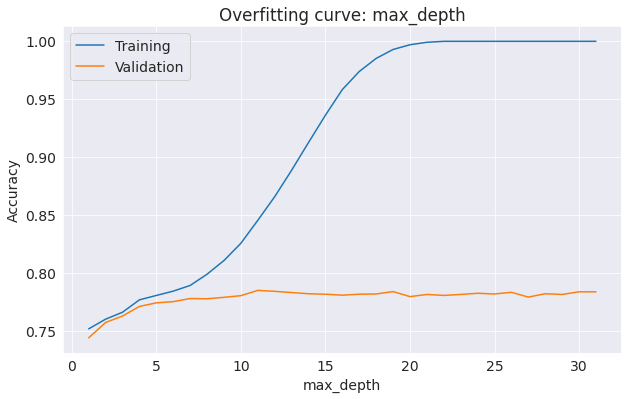

In [105]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=800, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_depth=[i for i in range(1,32)]
test_param_and_plot('max_depth',max_depth)

In [106]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=800, max_depth=12)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.8658503026967529, 0.7843582335947173)

#### `max_leaf_nodes`

Max Acc by: 184


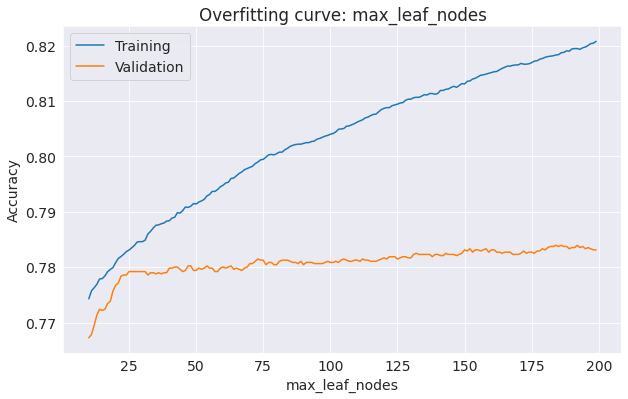

In [107]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                                   n_estimators=800, max_depth=12, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_leaf_nodes=[i for i in range(10,200)]
test_param_and_plot('max_leaf_nodes',max_leaf_nodes)

In [108]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.8022151898734177, 0.7810565414775072)

#### `max_features`

Max Acc by: 5


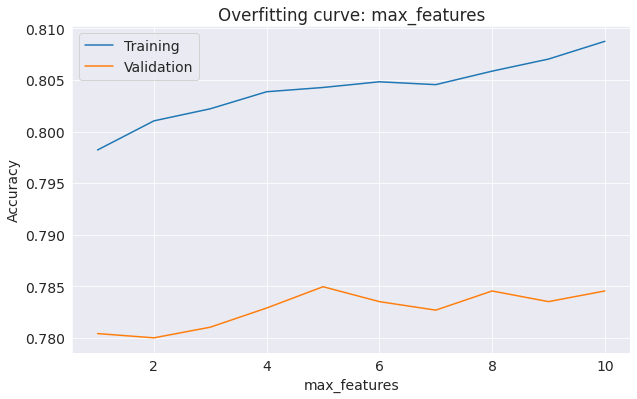

In [109]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_features=[i for i in range(1,11)]
test_param_and_plot('max_features',max_features)

In [110]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.8042790313703908, 0.7849773008666941)

#### `min_samples_split`

Max Acc by: 19


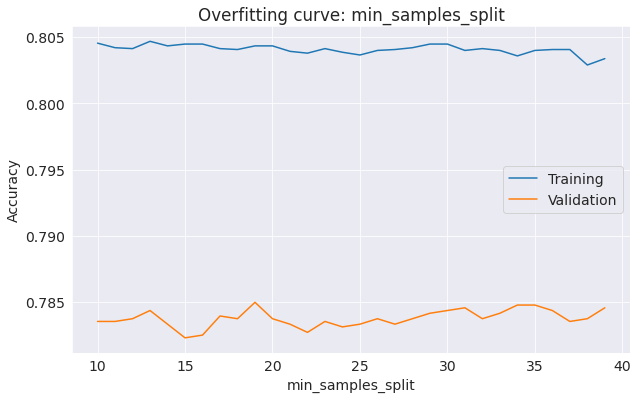

In [111]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5,
                                   **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_split=[i for i in range(10,40)]
test_param_and_plot('min_samples_split',min_samples_split)

In [112]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5,
                               min_samples_split=11)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.804210236653825, 0.7835328105654148)

#### `min_samples_leaf`

Max Acc by: 28


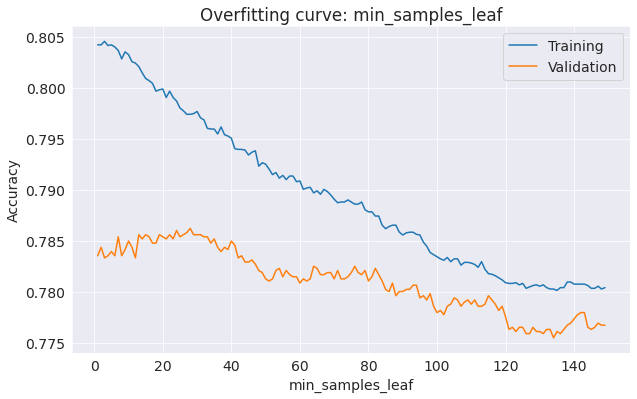

In [113]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5,
                               min_samples_split=11,**params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_leaf=[i for i in range(1,150)]
test_param_and_plot('min_samples_leaf',min_samples_leaf)

In [114]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5,
                               min_samples_split=11,
                               min_samples_leaf=1)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.804210236653825, 0.7835328105654148)

#### `min_impurity_decrease`

Max Acc by: 0


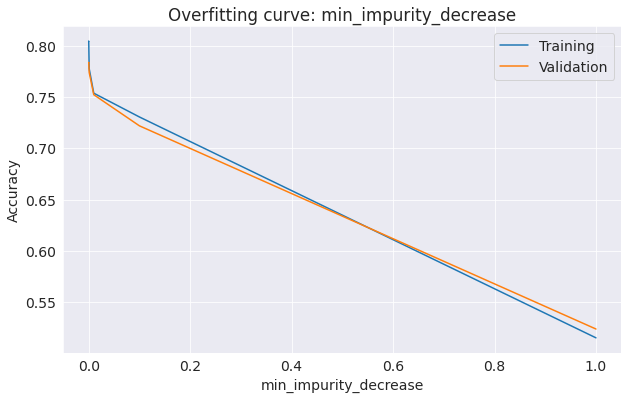

In [115]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5,
                               min_samples_split=11,
                               min_samples_leaf=1,**params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_impurity_decrease=[1.0e-10,0, 1.0e-9, 1.0e-7, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0]
test_param_and_plot('min_impurity_decrease',min_impurity_decrease)

In [116]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5,
                               min_samples_split=11,
                               min_samples_leaf=1,
                               min_impurity_decrease=0.0)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.804210236653825, 0.7835328105654148)

#### `bootstrap` 
No need to change the default boolean value which is `True`, since model performs better with bootstrap enabled.

#### `class_weight`

In [117]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5,
                               min_samples_split=11,
                               min_samples_leaf=1,
                               min_impurity_decrease=0.0, class_weight={0:4, 1:1})
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.7466978536048432, 0.7292612463887742)

In [118]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5,
                               min_samples_split=11,
                               min_samples_leaf=1,
                               min_impurity_decrease=0.0, class_weight={0:1.5, 1:1})
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.7973995597138139, 0.7779612051176228)

In [119]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5,
                               min_samples_split=11,
                               min_samples_leaf=1,
                               min_impurity_decrease=0.0, class_weight={0:1, 1:0})
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.4848651623555311, 0.4762690879075526)

None of the combinations of weights seem to be working here

### Predictions with Best Parameter Values

In [120]:
model = RandomForestClassifier(random_state=42, n_jobs=-1,
                               n_estimators=800, max_depth=12,
                               max_leaf_nodes=89, max_features=5,
                               min_samples_split=11,
                               min_samples_leaf=1,
                               min_impurity_decrease=0.0)
model.fit(X_train, train_targets)
print(base_accs)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9995872317006054, 0.776723070573669)


(0.804210236653825, 0.7835328105654148)

In [121]:
test_preds=model.predict(test_inputs)
test_preds

array([1, 0, 0, ..., 0, 1, 1])

In [122]:
pd.value_counts(test_preds) / len(test_preds)

0    0.732786
1    0.267214
dtype: float64

In [123]:
submission['Probability']=test_preds
submission.head()

,Id,Probability
0,1,1
1,2,0
2,3,0
3,4,1
4,5,1


In [124]:
#Saving the submissions
submission.to_csv('submission1.csv', index=None)

It gives the accuracy of 78.56% which is greater than what DecisionTreeClassifier's output had given.

### Saving the Model

In [125]:
import joblib

In [126]:
financial_distress = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col
}
#all input calls are numeric cols

In [127]:
joblib.dump(financial_distress, 'financial_distress')

['financial_distress']

In [128]:
financial_distress2 = joblib.load('financial_distress')

In [129]:
val_preds2 = financial_distress2['model'].predict(X_val)
accuracy_score(val_targets, val_preds2)

0.7835328105654148

## Future Work
My aim is to achieve highest accuracy for the predictions on the given dataset, therefore I'm planning to learn and use `Deep Learning Algorithms` after this course. I will also use this saved model from joblib to create a web application which will take inputs from the user and give output in the form of whether somebody is likely to suffer financial distress or not in near future. I will make its interefece as user-frinedly as possible.

## References
1. [Data-Manipulation](https://www.geeksforgeeks.org/data-manipulattion-in-python-using-pandas/)
1. [Kaggle](https://www.kaggle.com/)
1. [Scikit-learn](https://scikit-learn.org/stable/index.html) 
2. [Decision-Tree](https://www.geeksforgeeks.org/decision-tree/)
3. [Random-Forest](https://machinelearningknowledge.ai/python-sklearn-random-forest-classifier-tutorial-with-example/)
4. [Hyperparameter-Tuning](https://towardsdatascience.com/how-to-tune-hyperparameters-of-machine-learning-models-a82589d48fc8)